<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Gráficas de Waffle, Nubes de Palabras y Diagramas de Regresión</font></h1>


## Introducción

En este laboratorio aprenderemos a crear nubes de palabras y gráficos de waffles. Además empezaremos a conocer sobre librerías de visualización adicionales que están basadas en Matplotlib, una de ellas es la librería _seaborn_, y aprenderemos a crear diagramas de regresión con ella.


## Tabla de Contenido

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploración de Conjuntos de Datos con _pandas_](#0)<br>
2.  [Descarga y preparación de los datos](#2)<br>
3.  [Visualizar Datos con Matplotlib](#4) <br>
4.  [Gráficas de Waffle](#6) <br>
5.  [Nubes de Palabras](#8) <br>
6.  [Diagramas de Regresión](#10) <br> 
    </div>
    <hr>


# Exploración de Conjuntos de Datos con _pandas_ y Matplotlib<a id="0"></a>

Herramientas: Este curso hace un uso reiterado de [_pandas_](http://pandas.pydata.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) y [**Numpy**](http://www.numpy.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) para discutir, analizar y visualizar los datos. La principal librería grafica que exploraremos en este curso es [Matplotlib](http://matplotlib.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

Conjunto de Datos: Inmigración en Canadá desde 1980 a 2013 – [Flujos migratorios internacionales a y desde los países seleccionados – Revisión de 2015 ](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) del portal de la ONU.

El conjunto de datos contiene información anual sobre los flujos de migración internacional recopilada por los países de destino. Los datos representan flujos de entrada y salida de acuerdo con el lugar de nacimiento, ciudadanía o lugar de residencia anterior/próxima tanto para extranjeros como nacionales. En esta sesión, nos enfocaremos en los datos Migratorios de Canadá.


# Descarga y preparación de los datos <a id="2"></a>


Importar los Módulos Primarios:


In [1]:
import numpy as np  # muy útil para cálculos científicos con Python
import pandas as pd # Librería para estructar datos primarios
from PIL import Image # convierte imagenes en arreglos

Vamos a descargar e importar el conjunto principal de datos sobre Inmigración en Canadá utilizando el método _pandas_ `read_excel()`. Normalmente, antes de hacerlo, necesitaremos descargar un modulo requerido por _pandas_ para poder leer archivos de Excel. Este modulo es **xlrd**. Para tu comodidad, hemos preinstalado dicho modulo. De no ser así, tendrías que ejecutar la siguiente línea de código para instalar el modulo **xlrd**:

```
!conda install -c anaconda xlrd --yes
```


Descargar el conjunto de datos y asignarlo a un _pandas_ DataFrame


In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Veamos los primeros cinco elementos de nuestro conjunto de datos


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a encontrar cuantas entradas de datos hay en el conjunto


In [4]:
# imprimir el tamaño del DataFrame
print(df_can.shape)

(195, 51)


Limpiar datos. Haremos algunas modificaciones al conjunto original para facilitar la visualización de estos. Revisar el laboratorio _Introducción a Matplotlib y a las Graficas de Líneas_ y _Diagramas de Area, Barras e Histogramas_ para una descripción racional y detalladas de los cambios. 


In [5]:
# depurar el conjunto de datos para borrar columnas innecesarias (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# Cambiar el nombre de algunas columnas para que tengan sentido
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# Para tener consistencia, asegúrate de que todas las columnas sean del tipo cadena
df_can.columns = list(map(str, df_can.columns))

# Establece el nombre del país (country) como índice – muy útil para hacer búsquedas por países utilizando el método .loc
df_can.set_index('Country', inplace = True)

# Agrega un columna para el total
df_can['Total'] =  df_can.sum (axis = 1)

# años que usaremos en esta lección – de utilidad para graficar mas adelante
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 46)


# Visualizar los Datos mediante Matplotlib<a id="4"></a>


Importar `matplotlib`:


In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # necesario para las graficas de Waffle

mpl.style.use('ggplot') # opcional: para estilo tipo ggplot

# revisar la última versión de Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.4.2


# Gráficas de Waffle <a id="6"></a>

Una `grafica de waffle` es una visualización interesante que normalmente se crea para mostrar el progreso respecto a unas metas. Es una opción efectiva cuando estas tratando de añadir visualizaciones interesantes de alguna característica que consiste principalmente de celdas, como el tablero de control de Excel.


Revisemos el caso de estudio previo sobre Dinamarca, Noruega y Suecia.


In [7]:
# Vamos a crear un nuevo dataframe para estos tres países
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# veamos el dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3901.0
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2327.0
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866.0


Desafortunadamente al contrario de las R, las graficas de waffle no están establecidas en ninguna librería de visualización de Python. Por consiguiente, aprenderemos a diseñarlas desde cero.


**Paso 1.** El primer paso es determinar la proporción de cada categoría respecto al total.


In [8]:
# calcular la proporción de cada categoría respecto al total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# imprime las proporciones
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Paso 2.** El segundo paso es definir el tamaño total de la grafica.


In [9]:
width = 40 # ancho de la gráfica
height = 10 # altura de la gráfica

total_num_tiles = width * height # numero total de partes

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Paso 3.** El tercer paso es utilizar la proporción de cada categoría para determinar su numero de partes


In [10]:
# ccalcular el numero de partes de cada categoría respecto al total
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# imprime las partes por categoria 
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


En base a las proporciones calculadas, Dinamarca ocupa 129 partes de la grafica de `waffle`, Noruega 77 y Suecia 194.


**Paso 4.** El cuarto paso es crear una matriz que se asemeje a la grafica de `waffle` y rellenarla.


In [11]:
# inicializa la grafica como una matriz vacia
waffle_chart = np.zeros((height, width))

# define los indices que interactuaran a través de la grafica
category_index = 0
tile_index = 0

# rellena la gráfica 
for col in range(width):
    for row in range(height):
        tile_index += 1

        # si el numero de partes de la actual categoría es igual al numero de partes colocada
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ... proceder a la siguiente catgoria
            category_index += 1       
            
        # establece el valor de la clase a entero, el cual incremente con clase
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


Revisemos como se ve la matriz.


In [12]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Como era de esperarse, la matriz consiste en tres categorías y el numero total de cada instancia concuerda con el numero total de partes seleccionadas para cada categoría.


**Paso 5.** Mapear la matriz de grafica en una representación visual


<Figure size 432x288 with 0 Axes>

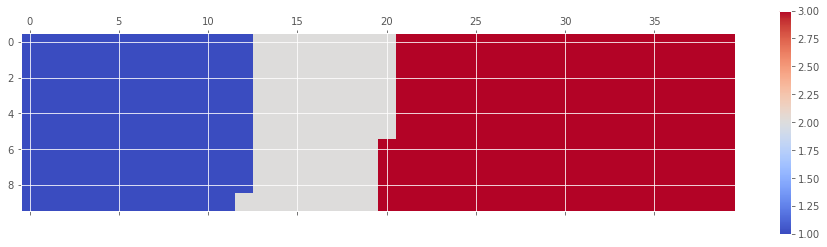

In [15]:
# instanciar un nuevo objeto "figure"
fig = plt.figure()

# usar matshow para mostrar la gráfica  
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Paso 6.** Embellecer la gráfica.


([], [])

<Figure size 432x288 with 0 Axes>

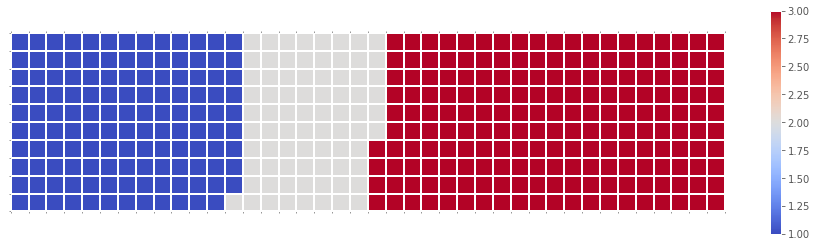

In [16]:
# instanciar un nuevo objeto "figure"
fig = plt.figure()

# usar matshow para mostrar la gráfica
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# obtener el eje 
ax = plt.gca()

# establecer anchos 
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# añadir una cuadricula basada en el ancho 
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Paso 7.** Crear una leyenda y añadirla a la gráfica


<Figure size 432x288 with 0 Axes>

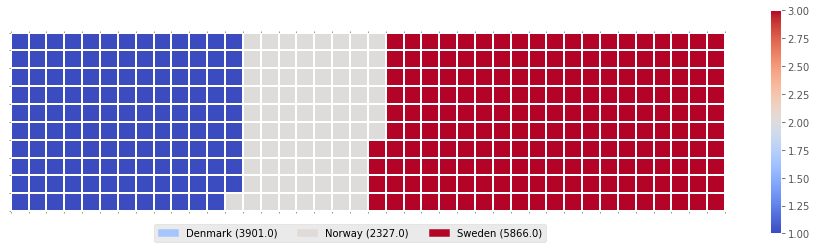

In [17]:
# instanciar un nuevo objeto "figure"
fig = plt.figure()

# usar matshow para mostrar la gráfica
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# obtener el eje 
ax = plt.gca()

# establecer anchos 
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# añadir una cuadricula basada en el ancho 
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Calcular la suma acumulada de las categorías individuales para hacer concordar el esquema de color entre la grafica y la leyenda
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# crear leyenda 
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# añadir una leyenda a la gráfica 
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

¡Aquí esta! Esta grafica de Waffle se ve _deliciosa_ ¿No te parece?


Seria ineficiente repetir estos siete pasos cada ve que deseemos crear una grafica. Así que vamos a combinar todos los pasos en una sola función llamada _create_waffle_chart_. Esta función tomara los siguientes parámetros de entrada:

> 1.  **categories**: Categoria unicas o clases en el dataframe
> 2.  **values**: Valores correspondientes a las categorias o clases 
> 3.  **height**: Define la altura de la gráfica 
> 4.  **width**: Define el ancho de la gráfica 
> 5.  **colormap**: Clase Colormap
> 6.  **value_sign**: Para poder hacer que nuestra función sea mas general, añadiremos este parámetro para tener en cuenta signos que pudieran estas asociados a algún valor, como puede ser %, $, etc. **value_sign** tiene un valor por defecto de cadena vacia.


In [18]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # calcular la proporción de cada categoria respecto al total 
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # calcular el numero total de partes 
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # calcular el numero de partes por categoria 
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # imprimir el numero de partes por categoria 
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # inicializar la gráfica como una matriz vacia 
    waffle_chart = np.zeros((height, width))

    # definir los indices que interactuaran con la gráfica 
    category_index = 0
    tile_index = 0

    # rellenar la gráfica 
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # si el numero de partes rellenada para la categoria actual 
            # es igual al numero de partes colocada
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceder a la siguiente categoria 
                category_index += 1       
            
            # establece el valor de la clase a entero, el cual incremente con clase
            waffle_chart[row, col] = category_index
    
    # instanciar un nuevo objeto "figure"
    fig = plt.figure()

    # usar matshow para mostrar la gráfica
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # obtener el eje 
    ax = plt.gca()

    # establecer anchos 
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # añadir una cuadricula basada en el ancho 
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # Calcular la suma acumulada de las categorías individuales para hacer concordar el esquema de color entre la grafica y la leyenda
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # crear una leyenda 
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # añadir una leyenda a la gráfica
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Ahora par crear una gráfica de `waffle` lo que debemos hacer es llamar a la función `create_waffle_chart`. Definamos los parametros de entrada: 


In [19]:
width = 40 # ancho de la gráfica
height = 10 # altura de la gráfica

categories = df_dsn.index.values # categorias 
values = df_dsn['Total'] # valores correspondientes de las categorias 

colormap = plt.cm.coolwarm # clase de color del mapa 

Ahora llamemos nuestra función para crear la gráfica de `waffle`.


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

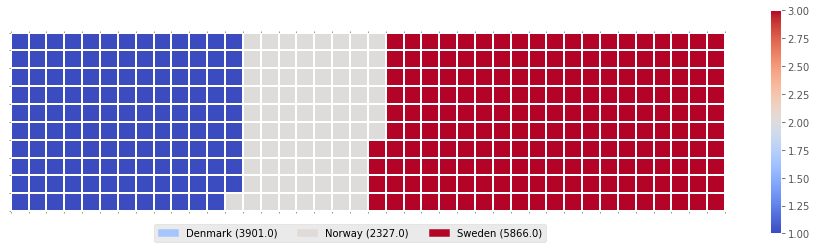

In [20]:
create_waffle_chart(categories, values, height, width, colormap)

Parece que existe un nuevo paquete de Python para generar `gráficas de waffle` llamado [PyWaffle](https://github.com/ligyxy/PyWaffle), pero parece que el repositorio aun esta en construcción. Revisalo y experimenta con el.


# Nubes de Palabra <a id="8"></a>

Las nubes de `Palabras` (tambien conocidas como nubes de texto o nubes de etiquetas) trabajan de una forma simple: cuanto mas especifico parece ser una palabra en una fuente de datos de texto (como un discuso, entrada de blog o base de datos), mayor parece ser la nube.


Por suerte, un paquete para Python existe para generar estas nubes de `palabras`. El paquete llamado `word_cloud` fue desarrollado por **Andreas Mueller**. Puedes aprender mas sobre el paquete en este [enlace](https://github.com/amueller/word_cloud/).

Usemos este paquete para saber como generar una nube de palabras dado un documento de texto.


Instalemos primero el paquete


In [21]:
# instalar wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

# importar el paquete y su conjunto de palabras 
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Las nubes de `Palabras` se usan comunmente para el análisis y visualización de alto nivel de texto. Experimentemos un poco con el conjunto de datos referente a la inmigración y trabajemos con un ejemplo que involucre el análisis de texto. Analicemos un novela corta escrita por **Lewis Carroll** titulada _Alice's Adventures in Wonderland_. Descargemos el archivo _.txt_ de la novela.


In [22]:
# descargar el archivo y guardarlo como alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# abrir el archivo y guardarlo en la variable alice_novel 
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


A continuación, vamos a usar las palabras vacías que importamos de `word_cloud`. Usamos la función _set_ para borrar cualquier palabra redundante.


In [23]:
stopwords = set(STOPWORDS)

Crea un objeto de tipo nube de palabras y genera una nube. Por simplicidad vamos a generar la nube con solo las primeras 2000 palabras de la novela.


In [24]:
# instanciar un objeto de tipo nube
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generar la nube de palabras 
alice_wc.generate(alice_novel)

¡Perfecto! Ahora que la nube esta creada, vamos a visualizarla.


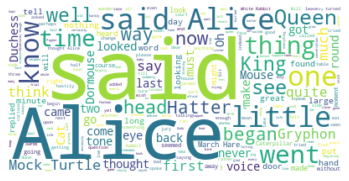

In [25]:
# mostrar la nube de palabras
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

¡Interesante! De forma que en las primeras 2000 palabras en la novela, las palabras mas comunes son **Alice**, **said**, **little**, **Queen**. Vamos a redimensaionar la nube de forma que veamos las palabras menos frecuentes.


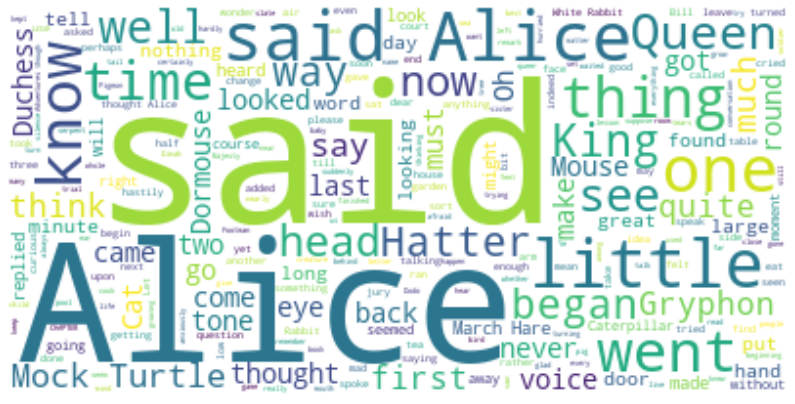

In [26]:
fig = plt.figure()
fig.set_figwidth(14) # establecer ancho
fig.set_figheight(18) # establecer altura

# mostrar la nube
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

¡Mucho mejor! Sin embargo, **said** no es una palabra que ofrezca mucha informacion, vamos a añadirla a nuestras palabras vacías y volver a generar la nube.


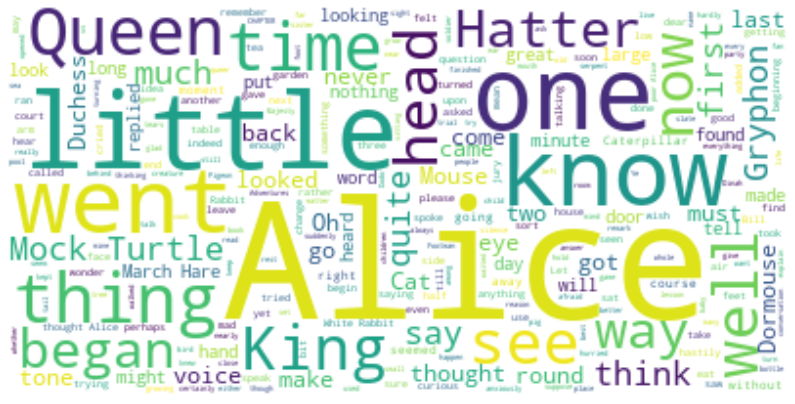

In [27]:
stopwords.add('said') # añadir las palabras "said" a las palabras vacías 

# voler a generar la nube 
alice_wc.generate(alice_novel)

# mostrar la nube 
fig = plt.figure()
fig.set_figwidth(14) # establecer ancho 
fig.set_figheight(18) # establecer altura 
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

!Excelente! Se ve muy interesante. Otra cosa que puedes implementar con el paquete `word_cloud` es superponer a las palabras una mascara de cualquier forma. Usemos una mascara de Alice y su conejo. Ya hemos creado la mascara para ti asi que vamos a continuar y descargarla, la llamaremos _alice_mask.png_.


In [28]:
# descargar imagen
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
    
# guardar la mascara como alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


Veamos como quedó la mascara


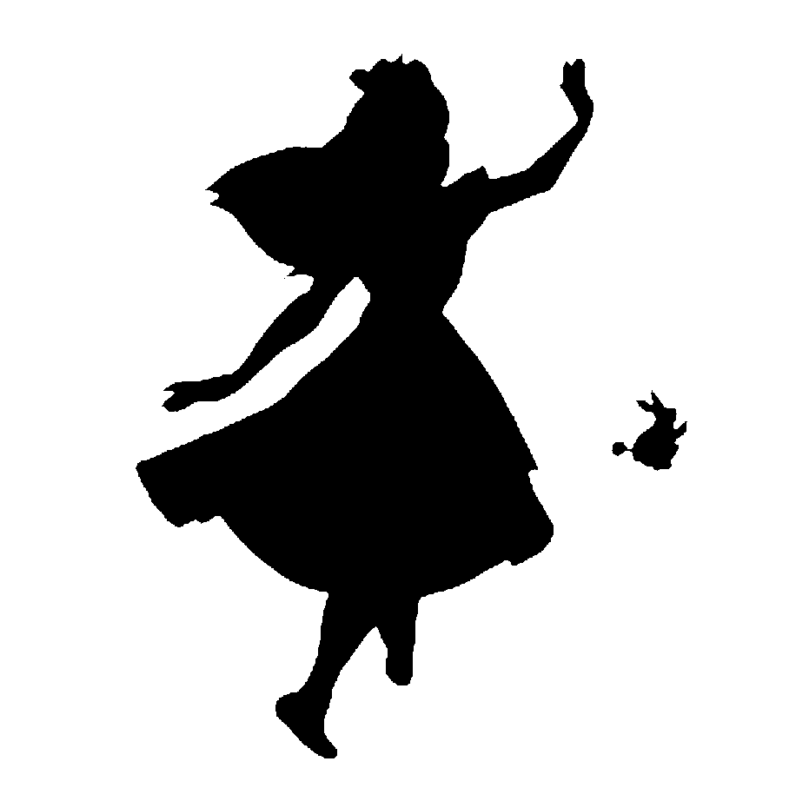

In [29]:
fig = plt.figure()
fig.set_figwidth(14) # establecer ancho 
fig.set_figheight(18) # establecer altura

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Darle forma a la nube de `palabras` de acuerdo a la mascara se hace de manera muy directa con el paquete `word_cloud`. Por simplicidad, continuaremos usando las primeras 2000 palabras de la novela.


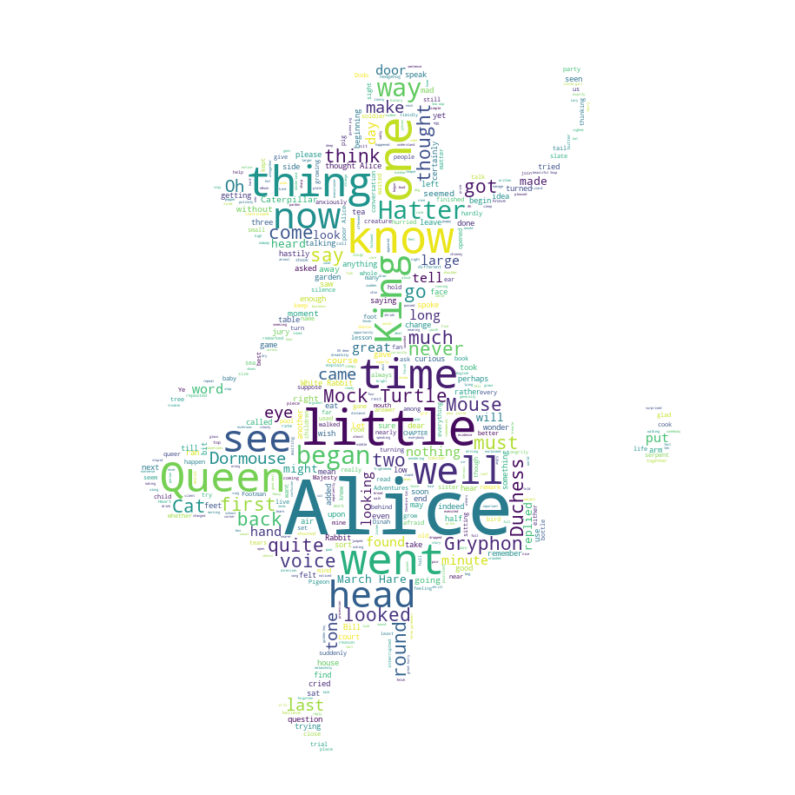

In [30]:
# instanciar un objeto tipo nube
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generar la nube 
alice_wc.generate(alice_novel)

# mostrar la nube 
fig = plt.figure()
fig.set_figwidth(14) # establecer el ancho 
fig.set_figheight(18) # establecer la altura 

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

¡Muy impresionante!


Desafortunadamente nuestros datos sobre inmigración no contienen datos tipo texto, pero cuando se desea se puede. Generemos datos tipo texto como ejemplo desde nuestro conjunto de datos sobre inmigración, digamos 90 palabras.


Recordemos como se veian nuestros datos.


In [31]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


¿Cual era la totalidad de la inmigración desde 1980 hasta 2013?


In [32]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

Usando países con nombres de una sola palabra, vamos a duplicar cada nombre en base a su contribución total de inmigración.


In [33]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # revisar si el nombre de un país contiene una sola palabra 
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# mostrar el texto generado 
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

En esta ocasión no existe ninguna palabra vacía así que no hay necesidad de pasarlas al crear la nube.


In [34]:
# crear la nube 
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


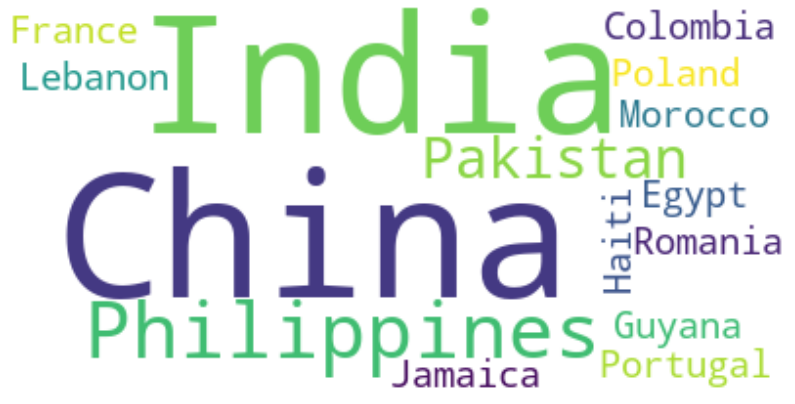

In [35]:
# mostrar la nube 
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

De acuerdo a la nube de palabras de arriba, parece que la mayoria de las personas que inmigraron vinierón de uno de la 15 países que se muestran en la nube. Una buena visualización que puedes construir sería quizas utilizar el mapa de Canadá y una mascara que superponga la nube de palabaras sobre el mapa. ¡Eso sería algo interesante para construir!


# Diagramas de Regresión <a id="10"></a>

> Seaborn es una librería visual de Python basada en matplotlib. Ofrece una interfaz de alto nivel para dibujar gráficos estadísticos atractivos. Puedes aprender ma sobre _seaborn_ siguiendo este [enlace](https://seaborn.pydata.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) y mas acerca de diagramas de regresión con _seaborn_ en este [enlace](http://seaborn.pydata.org/generated/seaborn.regplot.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


En el laboratorio _Diagramas de Pastel y Gráficos de Caja, Dispersión y Burbuja_ aprendimo a crear gráficos de dispersión y despues añadirle una línea de regresión. Tomó 20 líneas de código crear la gráfica y la línea. En esta sección, exploraremos _seaborn_ y vamos a ver que tan eficiente es crear líneas de regresión y juntarlas utilizando esta librería.


Instalemos primero _seaborn_


In [36]:
# instalar seaborn
#!conda install -c anaconda seaborn --yes

# importar librería
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


Crear un dataframe que almacene el número total de inmigrantes hacia Canadá por año desde 1980 hata 2013.


In [37]:
# podemos usar el método sum() para obtener la población total por año 
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# cambiar los años a tipo float (de utilidad para hacer la regresión) 
df_tot.index = map(float, df_tot.index)

# resetear el índice para ponerlo otra vez como columna en dataframe df_tot 
df_tot.reset_index(inplace=True)

# renombrar columnas 
df_tot.columns = ['year', 'total']

# ver el dataframe final 
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Con _seaborn_, generar un diagrama de regresión es tan sencillo con llamar a la función **regplot**.


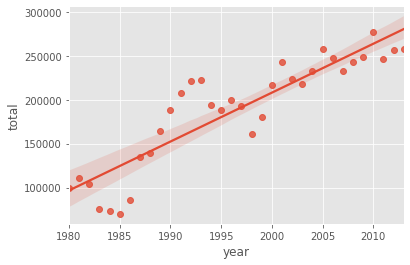

In [38]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

Esto no se trata de magia: ¡es _seaborn_! Además puedes adaptar el color del gráfico de dispersión y la línea de regresión. Cambiemos el color a verde.


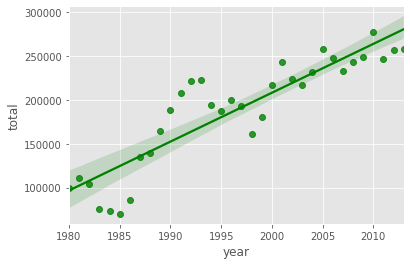

In [39]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

Siempre podrás modificar la forma del marcador, en vez de marcadores circulares, usemos '+'.


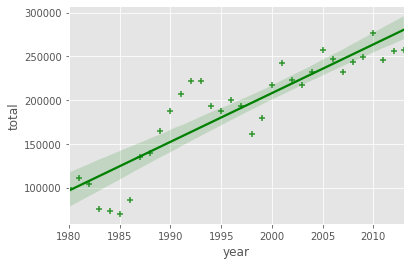

In [40]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Mejoremos las presentación de la gráfica un poco para que resulte mas atractiva a la vista.


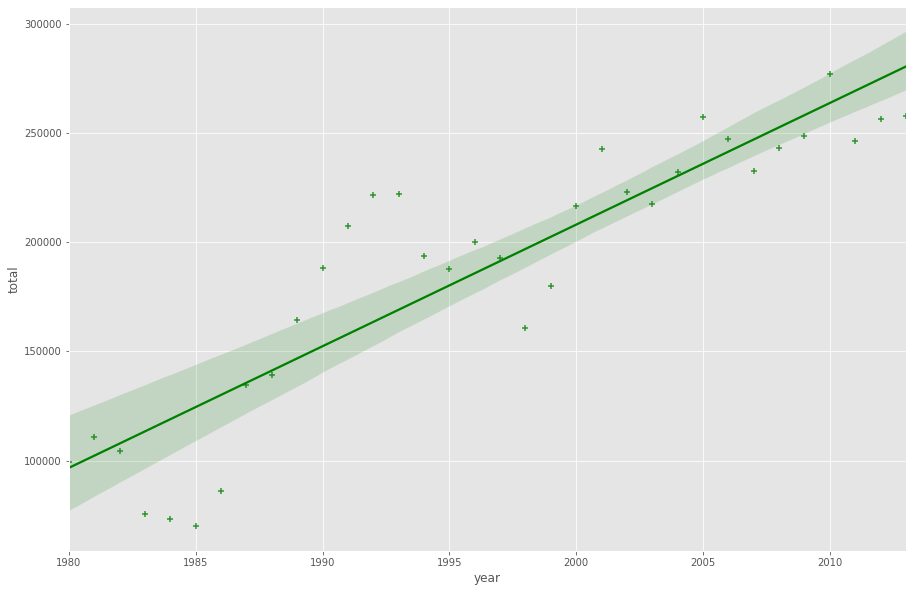

In [41]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Incrementemos también el tamaño de los marcadores para que se ajusten al nuevo tamaño de la imágen y añadamos titulos a las etiquetas en X y Y.


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

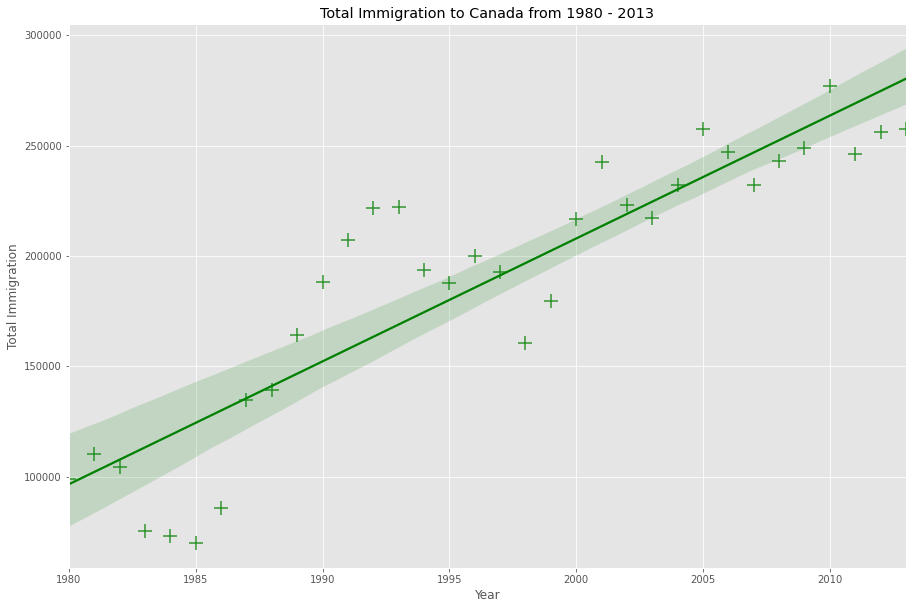

In [42]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # añadir los nombres al eje x y y
ax.set_title('Total Immigration to Canada from 1980 - 2013') # añadir titulo

Finalmente incrementa el tamaño de la letra en las etiquetas, el título y los dos ejes.


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

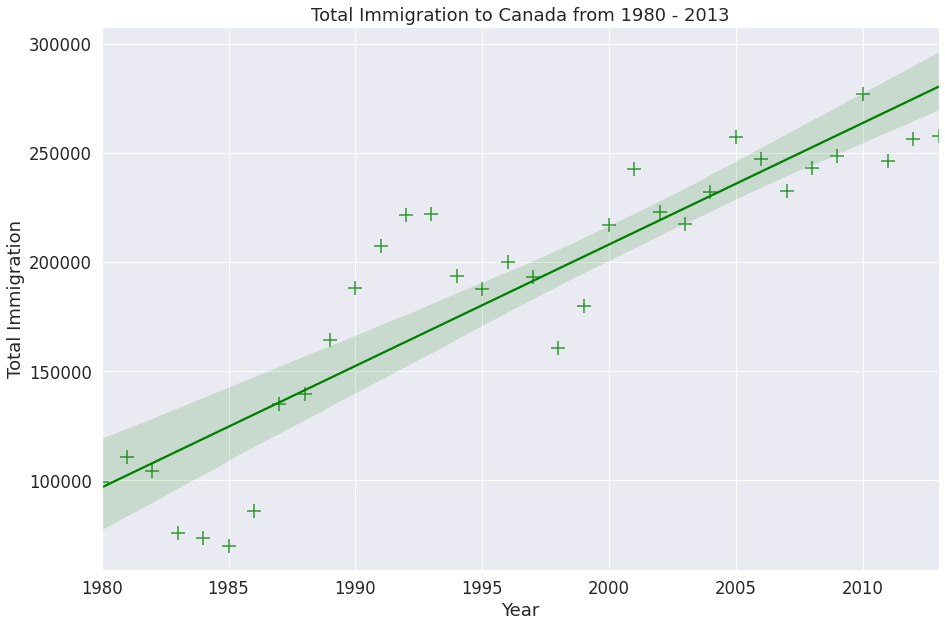

In [43]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

¡Estupendo! Un gráfico de dispersión completo con una línea de regresión en 5 líneas de código. ¿No es increible?


Si no te gusta mucho el fondo purpura, puedes cambiarlo facilmente a uno blanco.


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

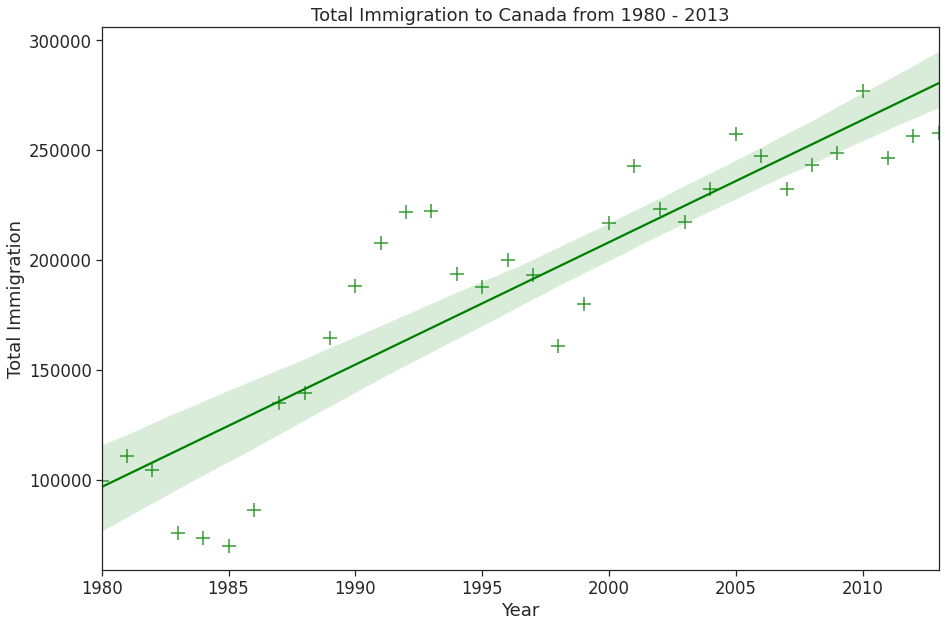

In [44]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # Cambia el fondo a blanco

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

O a un fondo blanco cuadriculado.


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

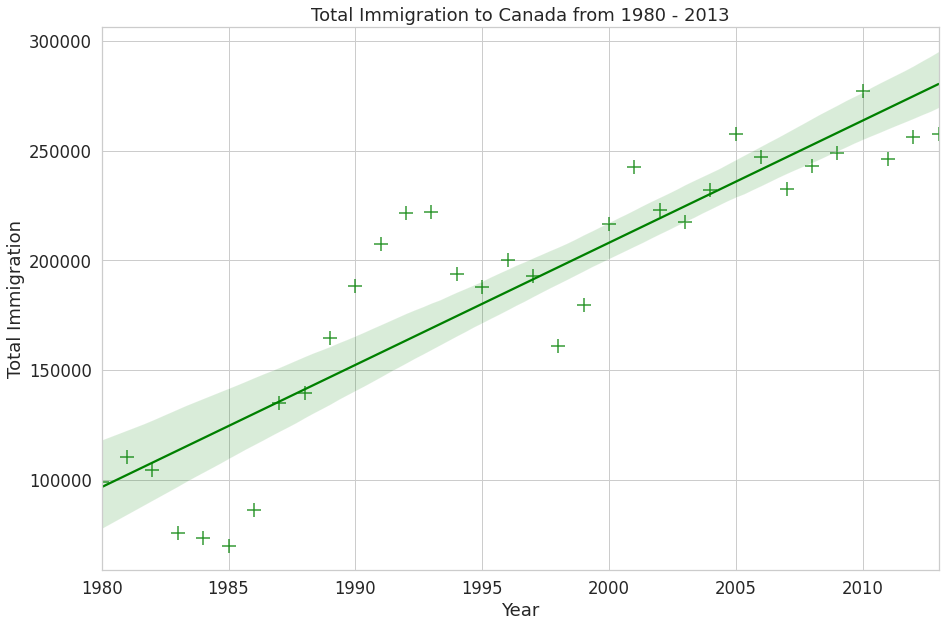

In [45]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

**Pregunta**: Usa seaborn para crear un gráfico de dispersión con una línea de regresión para visualizar la inmigración total desde Dinamarca, Suecia y Noruega hacia Canadá de 1980 a 2013.


In [ ]:
### Escribe aquí tu respuesta





Haz doble clic **aquí** para ver la solución.

<!-- The correct answer is:
\\ # create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
-->

<!--
\\ # create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
-->

<!--
\\ # reset index in place
df_total.reset_index(inplace=True)
-->

<!--
\\ # rename columns
df_total.columns = ['year', 'total']
-->

<!--
\\ # change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
-->

<!--
\\ # define figure size
plt.figure(figsize=(15, 10))
-->

<!--
\\ # define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
-->

<!--
\\ # generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')
-->


### ¡Gracias por completar este laboratorio!

Este cuaderno fue creado por Alex Aklson. Espero que hayas encontrado esta sesión interesante. ¡Por favor contáctame si tienes alguna pregunta!


Este cuaderno es parte del curso en **edX** llamado _The Data Science Method_. Si tienes acceso a este documento desde fuera del curso, puedes tomarlo en línea haciendo clic [aquí](https://cocl.us/DS0103EN_edX_LAB4).


<hr>

Copyright © 2019 [Cognitive Class](https://cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101ES-edX-20297760&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
